In [3]:
using Flux, Flux.Data.MNIST, Statistics, Flux.Optimise
using Flux: throttle, params
using Images


## Initializing MNIST

In [4]:
X = (float.(hcat(vec.(MNIST.images())...)) .> 0.5) 

┌ Info: Downloading MNIST dataset
└ @ Flux.Data.MNIST /home/subhaditya/.julia/packages/Flux/Fj3bt/src/data/mnist.jl:24
┌ Info: Downloading MNIST dataset
└ @ Flux.Data.MNIST /home/subhaditya/.julia/packages/Flux/Fj3bt/src/data/mnist.jl:24
┌ Info: Downloading MNIST dataset
└ @ Flux.Data.MNIST /home/subhaditya/.julia/packages/Flux/Fj3bt/src/data/mnist.jl:24
┌ Info: Downloading MNIST dataset
└ @ Flux.Data.MNIST /home/subhaditya/.julia/packages/Flux/Fj3bt/src/data/mnist.jl:24


784×60000 BitArray{2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0   

In [5]:
N, M = size(X, 2), 100

(60000, 100)

In [6]:
data = [X[:,i] for i in Iterators.partition(1:N,M)]

600-element Array{BitArray{2},1}:
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 ⋮
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 

# Defining our network and parameters

In [7]:
Dz, Dh = 5, 500
A, μ, logσ = Dense(28^2, Dh, tanh) , Dense(Dh, Dz) , Dense(Dh, Dz) 

(Dense(784, 500, tanh), Dense(500, 5), Dense(500, 5))

In [8]:
g(X) = (h = A(X); (μ(h), logσ(h)))

g (generic function with 1 method)

# Sample latent space

In [9]:
function sample_z(μ, logσ)
    eps = randn(Float32, size(μ)) 
    return μ + exp.(logσ) .* eps
end


sample_z (generic function with 1 method)

In [10]:
f = Chain(Dense(Dz, Dh, tanh), Dense(Dh, 28^2, σ))


Chain(Dense(5, 500, tanh), Dense(500, 784, σ))

# KL divergence and loss functions we need


In [11]:
kl_q_p(μ, logσ) = 0.5f0 * sum(exp.(2f0 .* logσ) + μ.^2 .- 1f0 .+ logσ.^2)

kl_q_p (generic function with 1 method)

In [12]:
function logp_x_z(x, z)
    p = f(z)
    ll = x .* log.(p .+ eps(Float32)) + (1f0 .- x) .* log.(1 .- p .+ eps(Float32))
    return sum(ll)
end

logp_x_z (generic function with 1 method)

In [13]:
L̄(X) = ((μ̂, logσ̂) = g(X); (logp_x_z(X, sample_z(μ̂, logσ̂)) - kl_q_p(μ̂, logσ̂)) * 1 // M)

L̄ (generic function with 1 method)

In [14]:
loss(X) = -L̄(X) + 0.01f0 * sum(x->sum(x.^2), params(f))

loss (generic function with 1 method)

# Generate a sample


In [15]:
function modelsample()  
  ϕ = zeros(Float32, Dz)
  p = f(sample_z(ϕ, ϕ))
  u = rand(Float32, size(p))
  return (u .< p) 
end

modelsample (generic function with 1 method)

# Train

In [16]:
evalcb = throttle(() -> @show(-L̄(X[:, rand(1:N, M)])), 10)
opt = ADAM()
ps = params(A, μ, logσ, f)


Params([Float32[-0.04325612 -0.04432942 … 0.024764992 0.0025093316; -0.06396034 0.0077259494 … -0.006176046 0.016506964; … ; 8.820455f-5 0.064784825 … 0.060753915 0.023969032; 0.009093919 0.05117704 … -0.0029312368 -0.05824799], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[-0.00041203704 -0.0528699 … -0.03941686 0.06000133; 0.05124626 -0.06446281 … 0.0718011 -0.04769289; … ; -0.024800759 0.068491444 … 0.101761356 -0.07139413; 0.033019643 0.010317117 … -0.019728636 0.05537383], Float32[0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.10620293 0.023587517 … 0.08458545 -0.020418482; -0.038067207 0.010741732 … 0.028195212 0.012534944; … ; -0.014529563 -0.087974004 … 0.028156698 0.045931697; -0.102924176 -0.032970604 … 0.029116375 0.035560943], Float32[0.0, 0.0, 0.0, 0.0, 0.0], Float32[-0.09521466 -0.08829451 … 0.020895256 0.0067901523; 0.108671494 -0.009676283 … 0.07440227 -0.0760235; … ; -0.0069366717 -0.011213775 … 0.06583009 

In [17]:
for i = 1:10
  @info "Epoch $i"
  Flux.train!(loss, ps, zip(data), opt, cb=evalcb)
end

┌ Info: Epoch 1
└ @ Main In[17]:2
-(L̄(X[:, rand(1:N, M)])) = 544.0159f0
-(L̄(X[:, rand(1:N, M)])) = 188.8044f0
-(L̄(X[:, rand(1:N, M)])) = 163.6948f0
-(L̄(X[:, rand(1:N, M)])) = 170.76443f0
-(L̄(X[:, rand(1:N, M)])) = 159.46655f0
-(L̄(X[:, rand(1:N, M)])) = 168.12997f0
-(L̄(X[:, rand(1:N, M)])) = 160.12689f0
-(L̄(X[:, rand(1:N, M)])) = 165.35117f0
-(L̄(X[:, rand(1:N, M)])) = 158.74713f0
-(L̄(X[:, rand(1:N, M)])) = 156.7229f0
┌ Info: Epoch 2
└ @ Main In[17]:2
-(L̄(X[:, rand(1:N, M)])) = 163.61983f0
-(L̄(X[:, rand(1:N, M)])) = 161.33939f0
-(L̄(X[:, rand(1:N, M)])) = 158.21996f0
-(L̄(X[:, rand(1:N, M)])) = 151.2085f0
-(L̄(X[:, rand(1:N, M)])) = 146.22623f0
-(L̄(X[:, rand(1:N, M)])) = 150.20674f0
-(L̄(X[:, rand(1:N, M)])) = 156.2229f0
-(L̄(X[:, rand(1:N, M)])) = 143.83652f0
┌ Info: Epoch 3
└ @ Main In[17]:2
-(L̄(X[:, rand(1:N, M)])) = 142.15207f0
-(L̄(X[:, rand(1:N, M)])) = 142.52904f0
-(L̄(X[:, rand(1:N, M)])) = 150.46121f0
-(L̄(X[:, rand(1:N, M)])) = 148.28822f0
-(L̄(X[:, rand(1:N, M)])

# Outputs

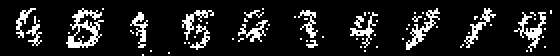

In [21]:
img(x) = Gray.(reshape(x, 28, 28))
sample = hcat(img.([modelsample() for i = 1:10])...)

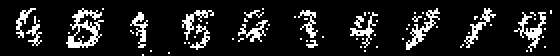

In [22]:
sample

In [24]:
save("sample.png", sample)